Question 1 - Extraction des données sur les actions de Tesla à l'aide de yfinance

In [4]:
import yfinance as yf

# Télécharger les données de Tesla
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Réinitialiser l’index
tesla_data.reset_index(inplace=True)

# Afficher les 5 premières lignes
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2 - Extraction des données sur les revenus de Tesla à l'aide de Webscraping

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
print(f"Nombre de tables trouvées : {len(tables)}")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Essayons avec la première table disponible
for table in tables:
    for row in table.tbody.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = tesla_revenue.append(
                {"Date": date, "Revenue": revenue}, ignore_index=True
            )

print(tesla_revenue.tail())


Nombre de tables trouvées : 0
Empty DataFrame
Columns: [Date, Revenue]
Index: []


Question 3 - Extraction des données boursières de GameStop à l'aide de yfinance

In [8]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

gme_data.reset_index(inplace=True)

gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712706,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Question 4 - Extraction des données de revenus de GameStop à l'aide de Webscraping

In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text

soup = BeautifulSoup(html_data, "html.parser")

tables = soup.find_all("table")
print(f"Nombre de tables trouvées : {len(tables)}")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

if len(tables) > 0:
    for row in tables[0].tbody.find_all("tr"):  # Utilise la première table
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            gme_revenue = gme_revenue.append(
                {"Date": date, "Revenue": revenue}, ignore_index=True
            )

    print(gme_revenue.tail())
else:
    print("Aucune table trouvée sur la page.")


Nombre de tables trouvées : 0
Aucune table trouvée sur la page.


Question 5 - Tableau de bord des actions et des revenus de Tesla 

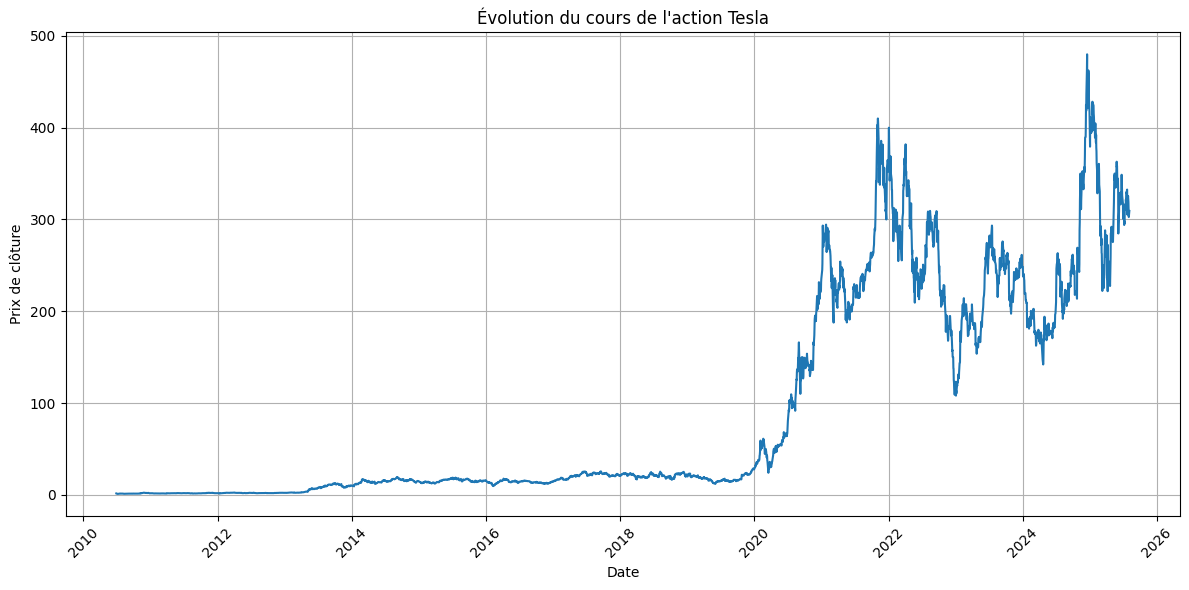

In [12]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Prix de clôture')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

make_graph(tesla_data, "Évolution du cours de l'action Tesla")


Question 6 - Tableau de bord des actions et des revenus de GameStop

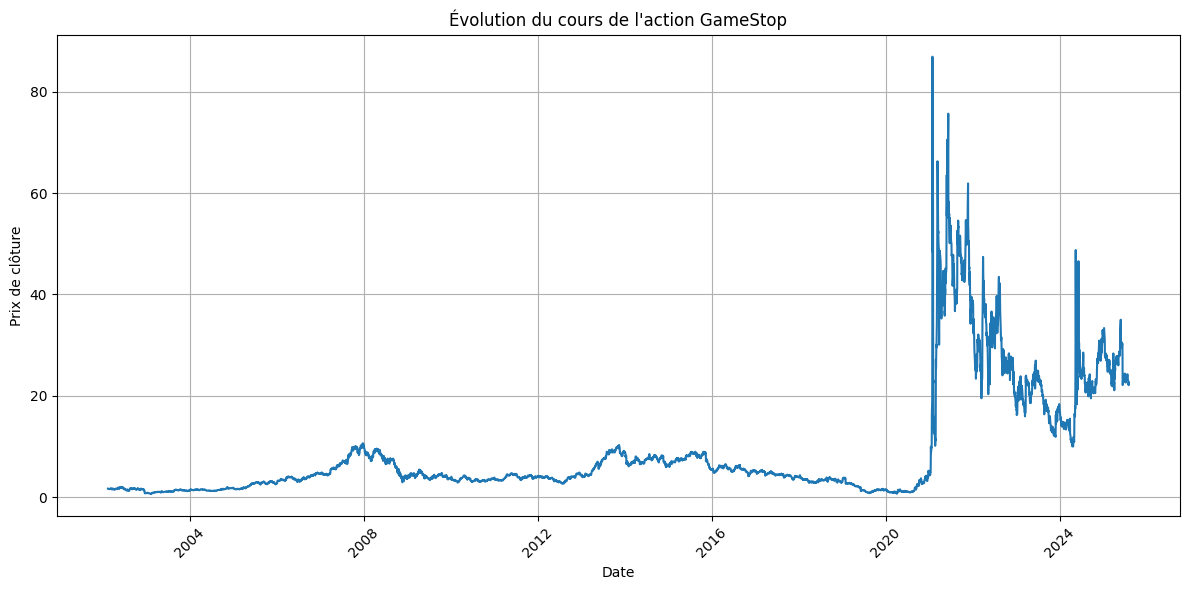

In [13]:
make_graph(gme_data, "Évolution du cours de l'action GameStop")